ADS - Network analysis module, homework 1

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


## Task 1. Analysis of Les Miserables network 

In [2]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('data/lesmis.gml')

### Q1. Visualize the network below with node labes and sizes proportional to node degree

C:\Users\mnorrick\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


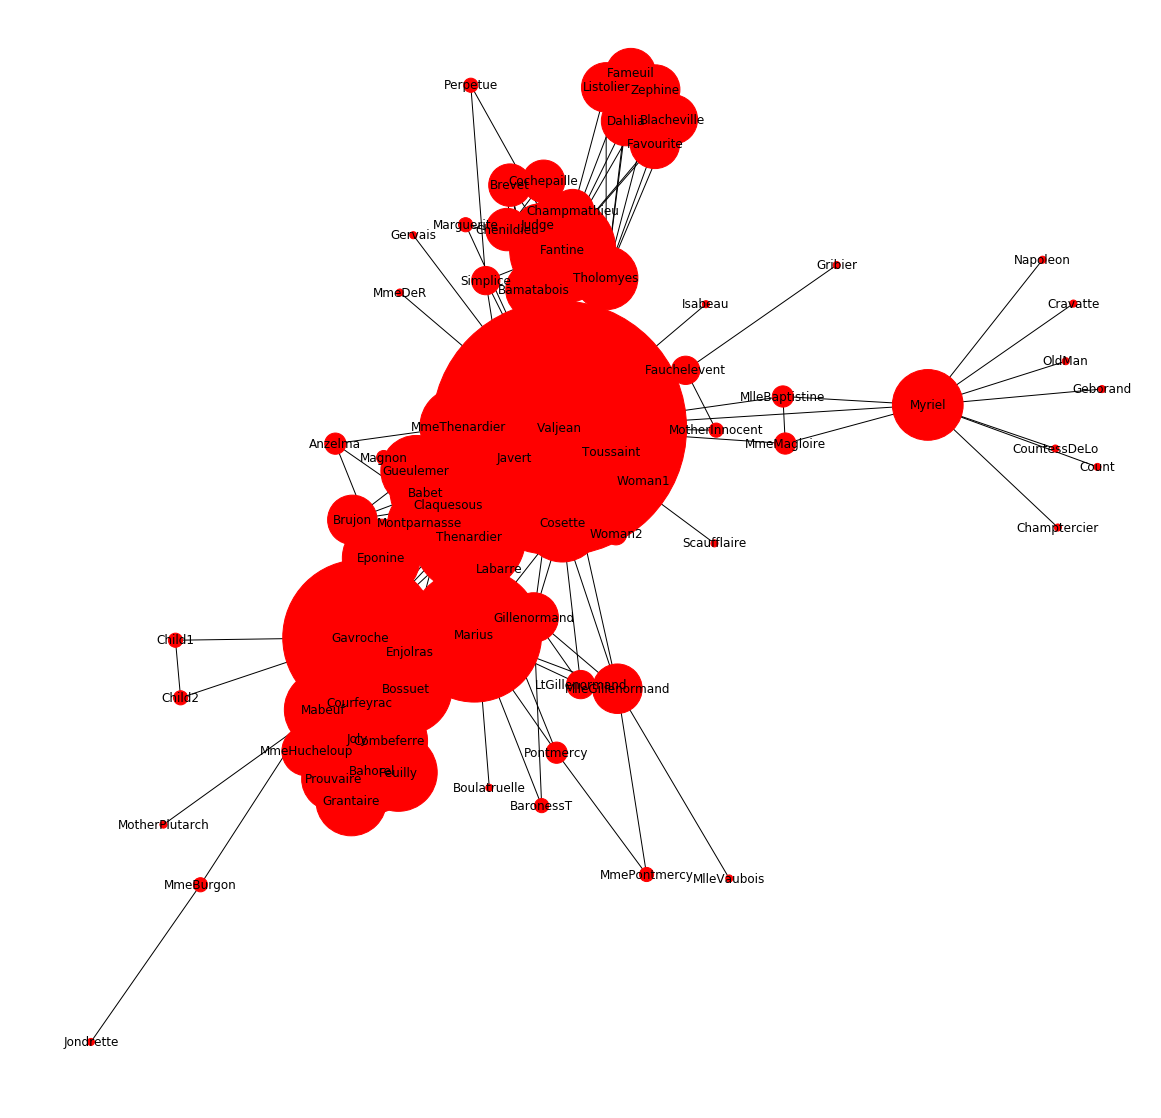

In [3]:
fig, ax = plt.subplots(figsize=(20,20))
nx.draw(G, node_size = 50 * np.array(list(dict(G.degree()).values()))**2, with_labels=True)

### Q2. Report top nodes by centrality
Print the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) betweenness centrality;

In [10]:
NodeDeg = dict(G.degree())
d_top_5 = sorted(NodeDeg, key=NodeDeg.get, reverse=True)[:5]

In [11]:
print("Top 5 Nodes by Degree Centrality")
for node in d_top_5:
    print(node, NodeDeg[node])

Top 5 Nodes by Degree Centrality
Valjean 36
Gavroche 22
Marius 19
Javert 17
Thenardier 16


In [12]:
between = dict(nx.betweenness_centrality(G))
b_top_5 = sorted(between, key=between.get, reverse=True)[:5]

In [13]:
print("Top 5 Nodes by Betweenness Centrality")
for node in b_top_5:
    print(node, between[node])

Top 5 Nodes by Betweenness Centrality
Valjean 0.5699890527836184
Myriel 0.17684210526315788
Gavroche 0.16511250242584766
Marius 0.132032488621946
Fantine 0.12964454098819422


### Q3. Analyze stability of Pagerank centrality
Analyze the impact of parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

In [14]:
alpha_values = [0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

top_5_by_alpha = {}

for alpha in alpha_values:
    page_rank = dict(nx.pagerank(G, alpha))
    top_5 = sorted(page_rank, key=page_rank.get, reverse=True)[:5]
    top_5_by_alpha[alpha] = top_5

In [16]:
top_5_by_alpha
#it seems like the interval between 0.7 and 0.9 is mostly stable

{0.95: ['Valjean', 'Gavroche', 'Marius', 'Myriel', 'Javert'],
 0.9: ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Javert'],
 0.85: ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Javert'],
 0.8: ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Javert'],
 0.7: ['Valjean', 'Myriel', 'Gavroche', 'Marius', 'Javert'],
 0.6: ['Valjean', 'Myriel', 'Gavroche', 'Javert', 'Marius'],
 0.5: ['Valjean', 'Myriel', 'Gavroche', 'Javert', 'Marius'],
 0.4: ['Valjean', 'Myriel', 'Gavroche', 'Javert', 'Marius'],
 0.3: ['Valjean', 'Myriel', 'Gavroche', 'Javert', 'Thenardier'],
 0.2: ['Valjean', 'Myriel', 'Gavroche', 'Thenardier', 'Javert'],
 0.1: ['Valjean', 'Myriel', 'Gavroche', 'Thenardier', 'Javert']}

### Task 2 (World airports). 
a) Find connected components, report their number and the sizes.  

b) In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

c) Find maximum and average network distance of the shortest path (number of edges, ragardless of size) between all pairs of the airports from the largest connected component. 

In [22]:
cities = pd.read_csv( 'data/citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [23]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [24]:
#now read the links
links = pd.read_csv( 'data/citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [25]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [26]:
#add edges to the network
Flights.add_edges_from(edgelist)

### a) Find connected components, report their number and the sizes.

In [34]:
nx.is_connected(Flights)

False

In [38]:
Airport_Connections = dict(Flights.degree())

In [41]:
sorted(Airport_Connections.items(), key=lambda x: x[1], reverse=True)

[('London', 311),
 ('Paris', 267),
 ('Frankfurt', 232),
 ('Moscow', 229),
 ('Amsterdam', 208),
 ('Atlanta', 208),
 ('Chicago', 199),
 ('Beijing', 184),
 ('Istanbul', 181),
 ('Dallas-fort Worth', 181),
 ('New York', 176),
 ('Houston', 176),
 ('Rome', 175),
 ('Dubai', 168),
 ('Denver', 162),
 ('Madrid', 160),
 ('Munich', 160),
 ('Shanghai', 158),
 ('Toronto', 155),
 ('Newark', 154),
 ('Los Angeles', 140),
 ('Minneapolis', 138),
 ('Seoul', 137),
 ('Las Vegas', 137),
 ('Washington', 136),
 ('Barcelona', 136),
 ('Detroit', 133),
 ('Bangkok', 132),
 ('Miami', 129),
 ('Charlotte', 129),
 ('Tokyo', 128),
 ('Zurich', 124),
 ('Guangzhou', 122),
 ('Vienna', 122),
 ('Manchester', 122),
 ('Singapore', 114),
 ('Kuala Lumpur', 114),
 ('St. Petersburg', 113),
 ('Duesseldorf', 112),
 ('Philadelphia', 112),
 ('Hong Kong', 111),
 ('Brussels', 111),
 ('Milano', 110),
 ('Stockholm', 109),
 ('Orlando', 109),
 ('Copenhagen', 106),
 ('Berlin', 104),
 ('San Francisco', 100),
 ('Fort Lauderdale', 99),
 ('Doha',

### b) In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$).

### c) Find maximum and average network distance of the shortest path (number of edges, ragardless of size) between all pairs of the airports from the largest connected component. 